In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.patches as ptch
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
from datetime import datetime
import urllib.request
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
from datetime import timedelta, datetime
from matplotlib.colors import Normalize
import matplotlib.dates as mdates
import locale

In [2]:
with open('config.json') as data_file:
            config = json.load(data_file)
dsn_api_key = config['dsn_api_key']

In [3]:
url = "https://api.darksky.net/forecast/{}/52.200521,20.963080?lang=pl&units=si".format(dsn_api_key)
html = urllib.request.urlopen(url).read()
forecast = json.loads(html.decode('utf-8'))

In [4]:
dttm = list()
temp = list()
cloud = list()
precip = list()
precip_p = list()
precip_t = list()

n = len(forecast['hourly']['data'])
for i in range(n):
    dttm.append(datetime.fromtimestamp(forecast['hourly']['data'][i]['time']))
    temp.append(forecast['hourly']['data'][i]['temperature'])
    cloud.append(forecast['hourly']['data'][i]['cloudCover'])
    precip.append(forecast['hourly']['data'][i]['precipIntensity'])
    precip_p.append(forecast['hourly']['data'][i]['precipProbability'])
    try:
        precip_t.append(forecast['hourly']['data'][i]['precipType'])
    except:
        precip_t.append('')

In [5]:
sunrise = list()
sunset = list()
m = len(forecast['daily']['data'])
for i in range(m):
    sunrise.append(datetime.fromtimestamp(forecast['daily']['data'][i]['sunriseTime']))
    sunset.append(datetime.fromtimestamp(forecast['daily']['data'][i]['sunsetTime']))

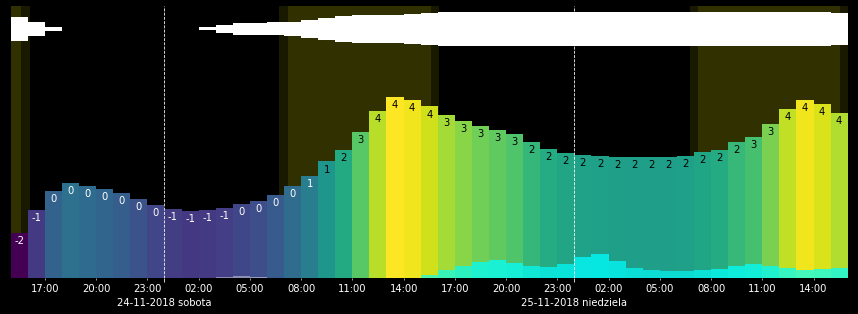

In [23]:
locale.setlocale(locale.LC_ALL, "pl_PL.utf8")

dttm_min = min(dttm)
dttm_max = max(dttm)
dttm_width = timedelta(hours=1)

temp_min = min(temp)
temp_max = max(temp)
temp_base = temp_min-2

scale_factor = (temp_max - temp_min)/8

norm_temp = Normalize(vmin=temp_min, vmax=temp_max, clip=True)
mapper_temp = cm.ScalarMappable(norm=norm_temp, cmap=cm.viridis) #coolwarm

plt.style.use('dark_background')

fig, ax = plt.subplots(1)

for s1,s2 in zip(sunrise, sunset):
    rect_daylight = patches.Rectangle((s1,temp_base), 
                                      (s2-s1),
                                      #(s2-s1).total_seconds()/(60*60*24), 
                                      temp_max+4-temp_base, 
                                      edgecolor='none', facecolor='yellow', alpha = 0.1)
    ax.add_patch(rect_daylight)
    
    rect_daylight_ext = patches.Rectangle((s1-timedelta(hours=0.5),temp_base), 
                                          (s2-s1+timedelta(hours=1)), 
                                          temp_max+4-temp_base, 
                                          edgecolor='none', facecolor='yellow', alpha = 0.1)
    ax.add_patch(rect_daylight_ext)

for x,t,c,p,pp,pt in zip(dttm, temp, cloud, precip, precip_p, precip_t):
    rect_temp = patches.Rectangle((x,temp_base), dttm_width, t-temp_base, edgecolor='none', 
                                  facecolor=mapper_temp.to_rgba(t))
    ax.add_patch(rect_temp)
    
    if t < (temp_max+temp_min)/2 :
        cl = 'white'
    else:
        cl = 'black'
    
    ax.text(x+timedelta(hours=0.5), t-0.1, str(round(t)), horizontalalignment='center', 
            verticalalignment='top', color = cl)
    c = c * scale_factor
    rect_cloud= patches.Rectangle((x,temp_max+3-c), dttm_width, c*2, edgecolor='none', facecolor='w')
    ax.add_patch(rect_cloud)
    
    pp = pp**0.2
    if pt == "rain":
        col = "aqua"
    elif pt == "snow":
        col = "snow"
    else: 
        col = "red"
    
    rect_precip= patches.Rectangle((x,temp_base), dttm_width, p*scale_factor*10, edgecolor='none', 
                                   facecolor=col, alpha = pp)
    ax.add_patch(rect_precip)
    
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%d-%m-%Y %A'))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
ax.grid(axis='x', linestyle='--')

ax.set_xlim([dttm_min-timedelta(hours=0), dttm_max+timedelta(hours=1)])
ax.set_ylim([temp_min-2, temp_max+4])

ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()